In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
from scipy import misc, ndimage

import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import PIL
cwd = os.getcwd()
print(cwd)

%matplotlib inline 

C:\Users\Lyokoheros\KCK\RecaptchaSolver\RecaptchaSolver


In [3]:
#przygotowanie danych




#zachowanie danych w pamięci


train_dir = '/dane/train'
dest_dir = '/dane/all'
counter = 0

for subdir, dirs, files in os.walk(train_dir):
    #print(files)
    for file in files:
        full_path = os.path.join(subdir, file)
        shutil.copy(full_path, dest_dir)
        counter = counter + 1
print(counter)



subdirs, dirs, files = os.walk('/dane/all').__next__()
m = len(files)
print(m)

filenames = []
labels = np.zeros((m, 1))



images_dir = '/content/all'
filenames_counter = 0
labels_counter = -1

for subdir, dirs, files in os.walk(train_dir):
    #print(files)
    for file in files:
        filenames.append(file)
        labels[filenames_counter, 0] = labels_counter
        filenames_counter = filenames_counter + 1
    labels_counter = labels_counter+1
    
print(len(filenames))
print(labels.shape)








batch_size = 4
epochs = 2
IMG_HEIGHT = 126
IMG_WIDTH = 126








0


StopIteration: 

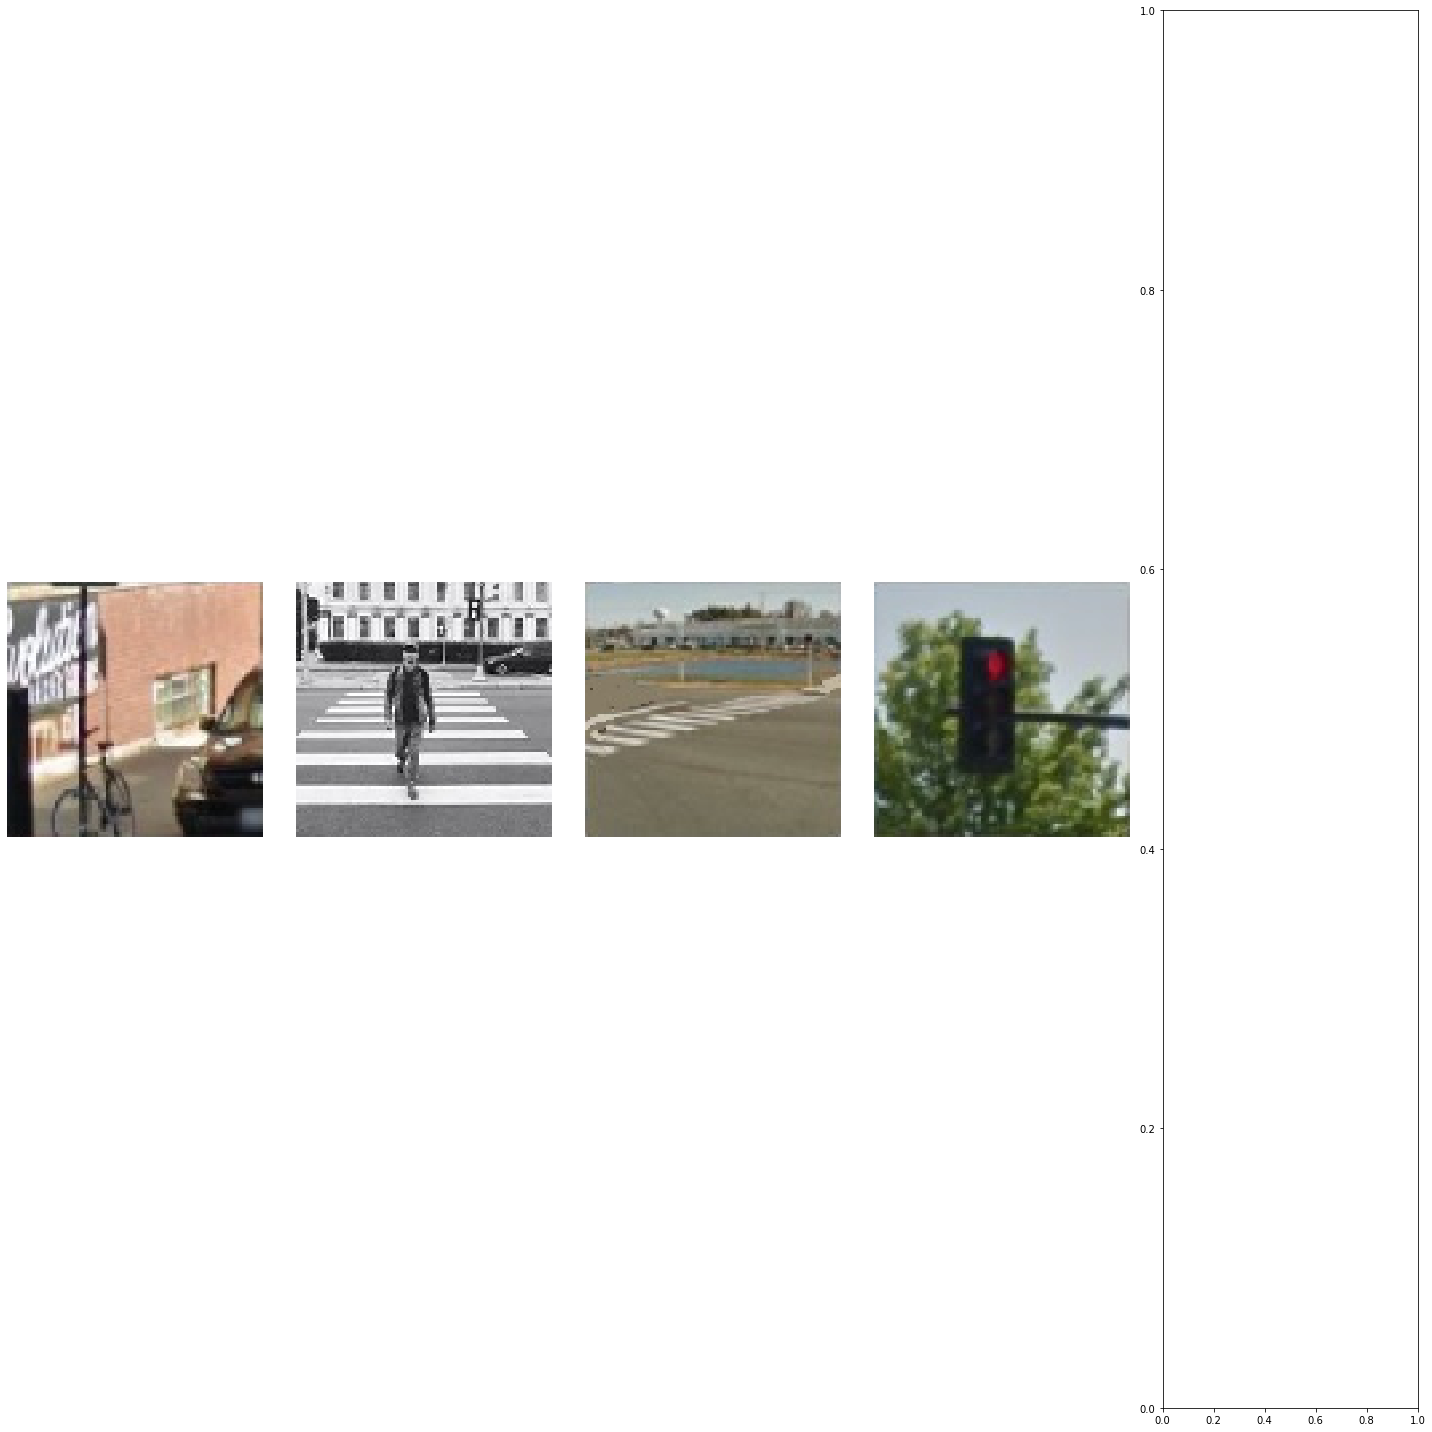

In [6]:
train_image_generator = ImageDataGenerator(
#    featurewise_center=True,
#    featurewise_std_normalization=True,
#    rotation_range=20,
#    width_shift_range=0.1,
#    height_shift_range=0.1,
#    shear_range=10,
#    brightness_range= (0.2, 0.8),
#    horizontal_flip=True,
#    vertical_flip=True,
#    fill_mode='nearest',
    rescale=1./255)
 
validation_image_generator = ImageDataGenerator(rescale=1./255)



train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')


val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')




#test danych
sample_training_images, _ = next(train_data_gen)

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes) :
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
    
plotImages(sample_training_images[:5])




In [7]:
#przygotowanie modelu sieci

#model = Sequential([
#    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
#    MaxPooling2D(),
#    Conv2D(32, 3, padding='same', activation='relu'),
#    MaxPooling2D(),
#    Conv2D(64, 3, padding='same', activation='relu'),
#    MaxPooling2D(),
#    Flatten(),
#    Dense(32, activation='relu'),
#    Dense(1, activation='sigmoid')
#])

model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0

In [8]:
#trenowanie

history = model.fit_generator(
    validation_image_generator.flow(train_data_gen),
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

MemoryError: Unable to allocate array with shape (4, 96, 96, 3) and data type float32

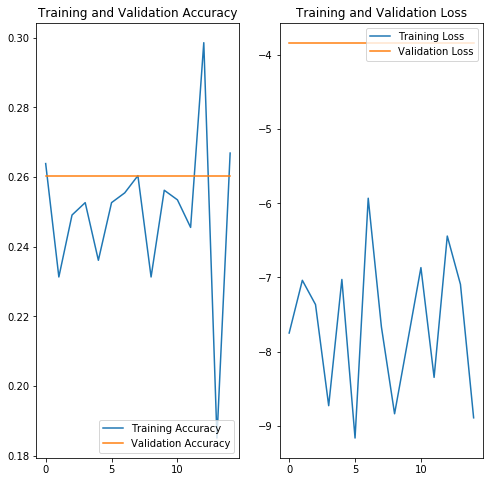

In [5]:
#Podsumowanie wyników

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()